Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее,
медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для
переменных
4. Визуализировать распределение переменной ‘Price’,
рассчитать показатели skewness и kurtosis
5. Визуализировать несколько взаимосвязей между
переменными
6. Выдвинуть несколько гипотез по набору имеющихся
переменных и проверить эти гипотезы с использованием t-test.
7. Загрузить результат (в формате .ipynb ноутбука) в
репозиторий. Разместить ссылку на репозиторий в лк на сайте.

In [27]:
# загружаем все необходимые нам в работе библиотеки
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [14]:
# читаем файл и выводим первых пять строк
df = pd.read_csv('auto.csv')
df.head(100)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,158,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,158,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,192,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,23875


In [3]:
# Смотрим на качество данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [4]:
# отношение столбцов друг к другу
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.select_dtypes(include = 'object').mode()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi


In [6]:
# Рассчитать и визуализировать корреляционную матрицу для переменных
df_corr = df.corr()
df_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


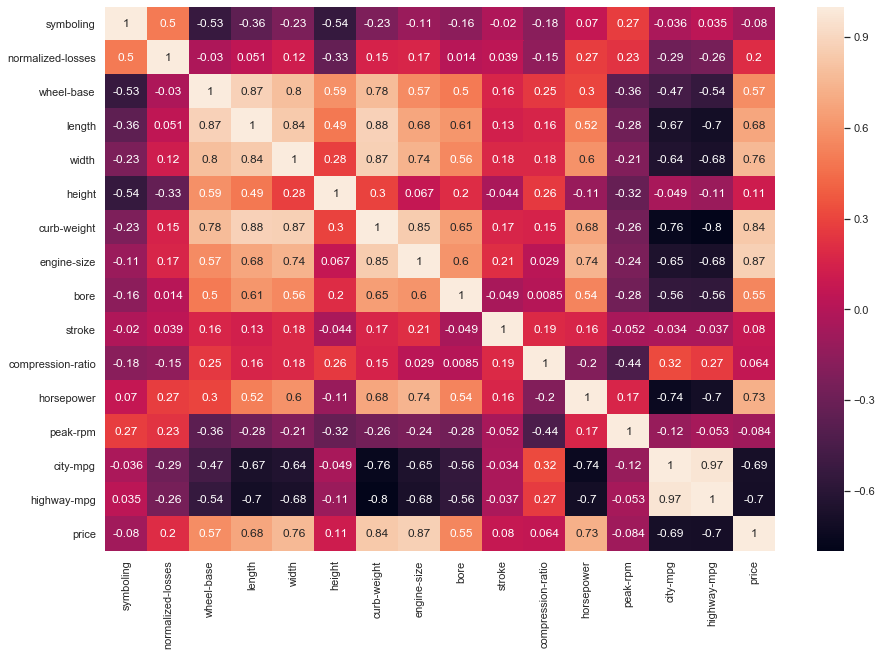

In [7]:
# Вызввать график отношения столбцов
# будем использовать график тепловую схему

sns.set(rc=({'figure.figsize':(15,10)}))
sns.heatmap(df_corr,annot = True)

In [9]:
#import pandas_profilling
#df.profile_report()

In [10]:
# Расчет показателя skew из бибилиотеки skipy
skew(df['price'])

1.7534486514523662

In [11]:
# Расчет показателя kurtosis из бибилиотеки skipy
kurtosis(df['price']);

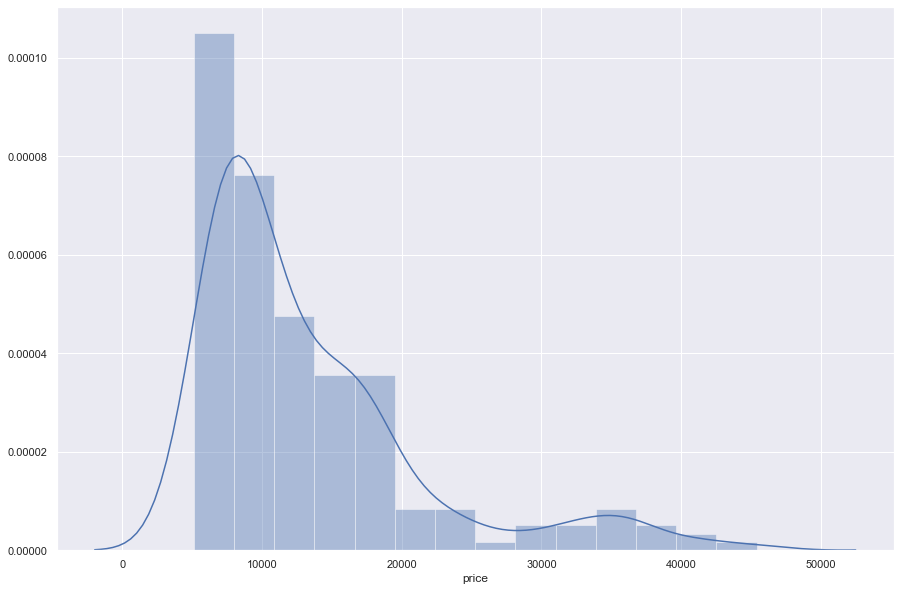

In [12]:
# график стоимости по отношению к всем колонкам
sns.distplot(df['price'])

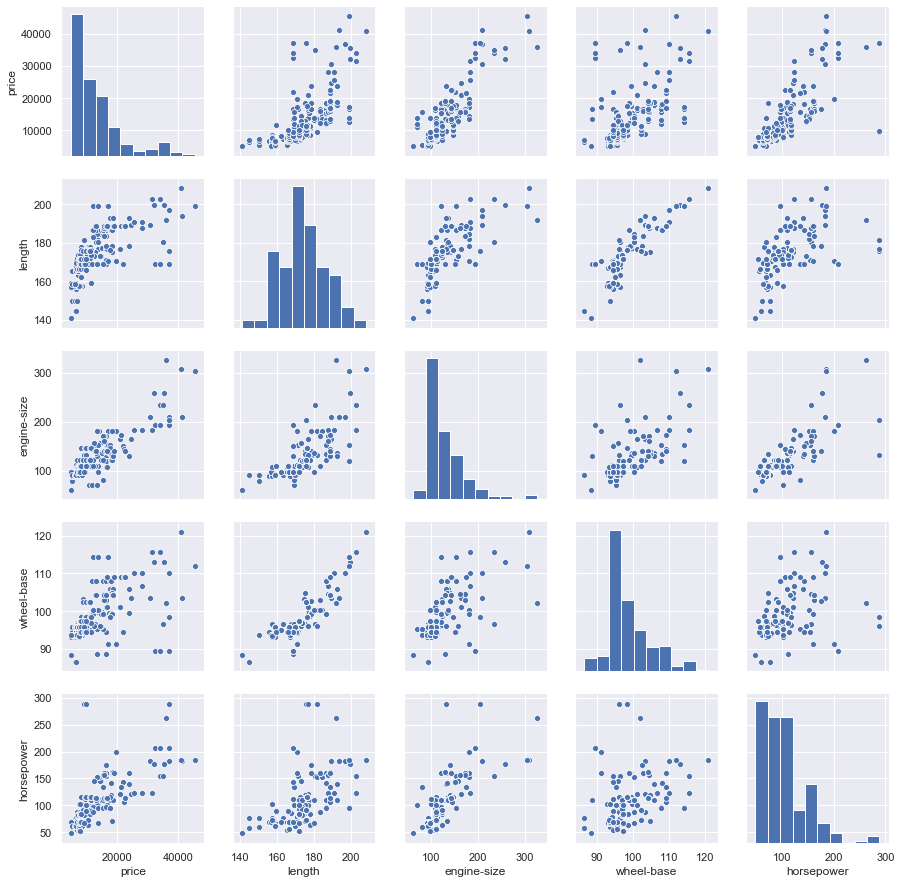

In [13]:
# поиск взаимосвязей и корелляций между отдельными столбцами.
sns.pairplot(df, vars = ['price','length','engine-size','wheel-base','horsepower'], kind = 'scatter');

In [23]:
#Выдвинуть несколько гипотезы

#Машины на газе расходуют стоят столько же сколько и машины на дизеле
df_disel = df[df['fuel-type'] == 'diesel']['price']
df_gas = df[df['fuel-type'] == 'gas']['price']

In [24]:
len(df_disel), len(df_gas)

(20, 185)

In [25]:
diesel = df_disel.sample(20)
gas = df_gas.sample(20)

In [28]:
statistics.variance(diesel), statistics.variance(gas)

(60215174.45, 77971584.22105263)

In [30]:
stats.ttest_ind(gas,diesel, equal_var= False)

Ttest_indResult(statistic=-1.0849468464049024, pvalue=0.2848926734352794)

In [ ]:
# невозможно отклонить нулевую гипотезу так как полученный p-value > 0.05

In [34]:
#Выдвинуть несколько гипотезы

#Марки bmw и mercedes стоят одинаково
df_bmw = df[df['make'] == 'bmw']['price']
df_mb = df[df['make'] == 'mercedes-benz']['price']

In [35]:
len(df_bmw), len(df_mb)

(8, 8)

In [36]:
statistics.variance(df_bmw), statistics.variance(df_mb)

(85818583.92857143, 46098129.14285714)

In [37]:
stats.ttest_ind(df_bmw,df_mb, equal_var= False)

Ttest_indResult(statistic=-1.853911999840017, pvalue=0.08686726538037716)

In [ ]:
# Стоят они совсем не одинково так как число p-value составляет  0.08 
# Невозиожно отклонить нулевую гипотезу так как число p-value > 0.05